In [5]:
import pandas as pd
import numpy as np

## Testing with large datasets

#### 6 cores per worker, 2 gb each executor - Simple action (Take(20))

In [14]:
import matplotlib.pyplot as plt

df5 = pd.read_csv(r'F:\FPT\DE_assignments\080824\SparkScripts\input\results\execution_statistics_take.csv')
df5


,Execution Time (s),Number of Workers,Number of Executors,Number of Partitions,Executor Cores,Executor Memory
0,50.516859,3,9,3,2,2g
1,60.738994,3,9,6,2,2g
2,63.947159,3,9,9,2,2g
3,63.320751,3,9,12,2,2g
4,62.929509,3,9,15,2,2g
5,60.283917,3,9,18,2,2g
6,61.272729,3,9,21,2,2g
7,60.786351,3,9,24,2,2g
8,59.689173,3,9,27,2,2g
9,59.283559,3,9,30,2,2g


C:\Users\hanhn\AppData\Local\Temp\ipykernel_12152\539054011.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


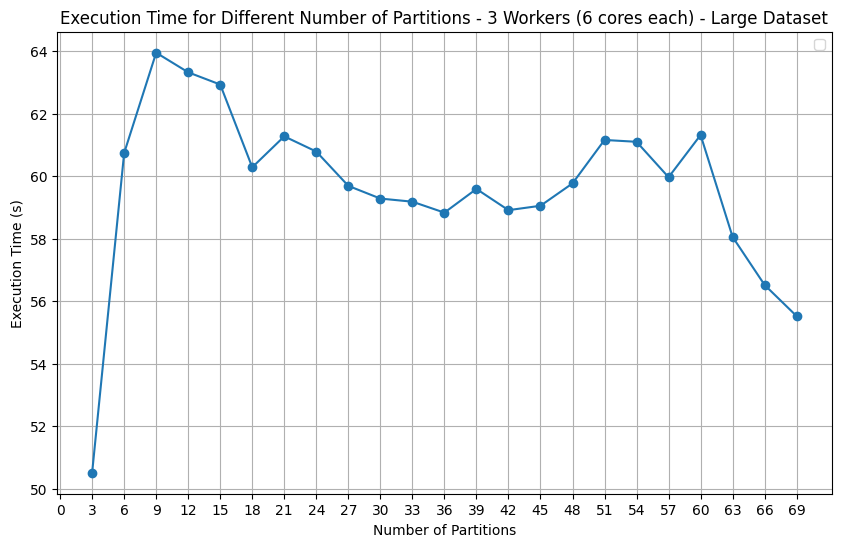

In [15]:

xticks = np.arange(0, 70, 3)
plt.figure(figsize=(10, 6))
plt.plot(df5['Number of Partitions'], df5['Execution Time (s)'], marker='o')
plt.title('Execution Time for Different Number of Partitions - 3 Workers (6 cores each) - Large Dataset')
plt.xlabel('Number of Partitions')
plt.ylabel('Execution Time (s)')
plt.grid(True)
plt.xticks(xticks)
plt.legend()
plt.show()

### 2 cores per worker, 1 gb each executor

In [25]:
import matplotlib.pyplot as plt

df4 = pd.read_csv(r'F:\FPT\DE_assignments\080824\SparkScripts\input\results\execution_statistics_large.csv')
df4_2_1gb = df4.iloc[0:4]
df4_2_1gb


,Execution Time (s),Number of Workers,Number of Executors,Number of Partitions,Executor Cores,Executor Memory
0,829.055510,3,3,6,NaN,NaN
1,827.291242,3,3,12,NaN,NaN
2,812.412042,3,3,18,NaN,NaN
3,849.180954,3,3,24,NaN,NaN


C:\Users\hanhn\AppData\Local\Temp\ipykernel_12152\1751828200.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


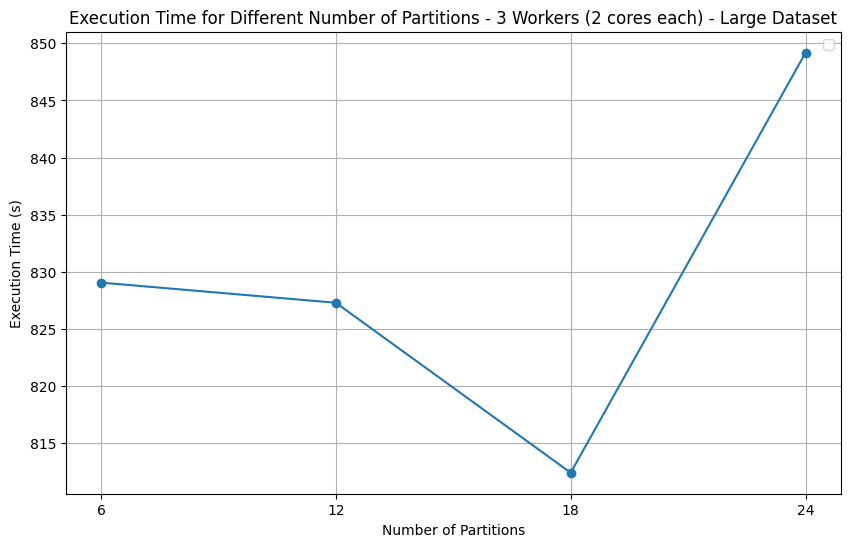

In [21]:
xticks = np.arange(6, 30, 6)
plt.figure(figsize=(10, 6))
plt.plot(df4_2_1gb['Number of Partitions'], df4_2_1gb['Execution Time (s)'], marker='o')
plt.title('Execution Time for Different Number of Partitions - 3 Workers (2 cores each) - Large Dataset')
plt.xlabel('Number of Partitions')
plt.ylabel('Execution Time (s)')
plt.grid(True)
plt.xticks(xticks)
plt.legend()
plt.show()

18 partitions seems to be a good number, but try to decrease the memory per executor

### 2 cores per worker, 500m each executor

In [24]:
# Row 5 of df4
df4_2_500m = df4.iloc[4:5]
df4_2_500m

,Execution Time (s),Number of Workers,Number of Executors,Number of Partitions,Executor Cores,Executor Memory
4,829.687317,3,3,18,NaN,500m


Not improve a lot 

Try to increase resource to test with the same number of partitions: 

### 6 cores per worker, 2 cores and 2gb per executor

In [28]:
df4_6_2gb = df4.iloc[5:9]
df4_6_2gb

,Execution Time (s),Number of Workers,Number of Executors,Number of Partitions,Executor Cores,Executor Memory
5,683.036562,3,9,18,2.0,2g
6,711.010580,3,9,18,2.0,2g
7,652.114223,3,9,18,2.0,2g


Improved a lot! 

But why cannot submit with other partititon lower than 18 - it just passed the coalesce stage but cannot submit the task to count stage

## 10M dataset (~96MB)

### Stop SparkContext each finished application execution 

#### 3 Workers, 2 cores each

In [32]:
import matplotlib.pyplot as plt

df3 = pd.read_csv(r'F:\FPT\DE_assignments\080824\SparkScripts\input\results\execution_statistics_3.csv')
df3


,Execution Time (s),Number of Workers,Number of Executors,Number of Partitions
0,133.341546,3,3,3
1,89.485180,3,3,6
2,105.948224,3,3,9
3,90.654354,3,3,12
4,97.761662,3,3,15
5,92.059211,3,3,18
6,94.859283,3,3,21
7,92.137096,3,3,24
8,94.888966,3,3,27
9,93.696864,3,3,30


C:\Users\hanhn\AppData\Local\Temp\ipykernel_12152\1148875680.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


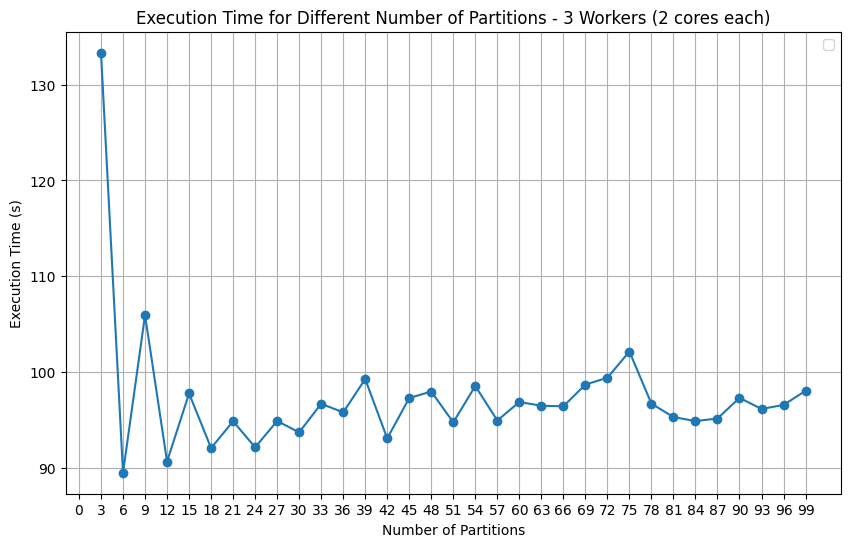

In [33]:
xticks = np.arange(0, 100, 3)
# Plot 2 separate line for each df
# plot 2 separate lines for df1 and df2
plt.figure(figsize=(10, 6))
plt.plot(df3['Number of Partitions'], df3['Execution Time (s)'], marker='o')
plt.title('Execution Time for Different Number of Partitions - 3 Workers (2 cores each)')
plt.xlabel('Number of Partitions')
plt.ylabel('Execution Time (s)')
plt.grid(True)
plt.xticks(xticks)
plt.legend()
plt.show()

Seems fluctuating, but multiple of 6 seems to be good choices

### Run in 1 SparkContext with multiple jobs

#### 3 workers, 6.7gb each - 18 cores, 2gb per executor

In [35]:
import matplotlib.pyplot as plt

df1 = pd.read_csv(r'F:\FPT\DE_assignments\080824\SparkScripts\input\results\execution_statistics.csv')
df2 = pd.read_csv(r'F:\FPT\DE_assignments\080824\SparkScripts\input\results\execution_statistics_2.csv')


In [44]:
# df1

In [45]:
# df2

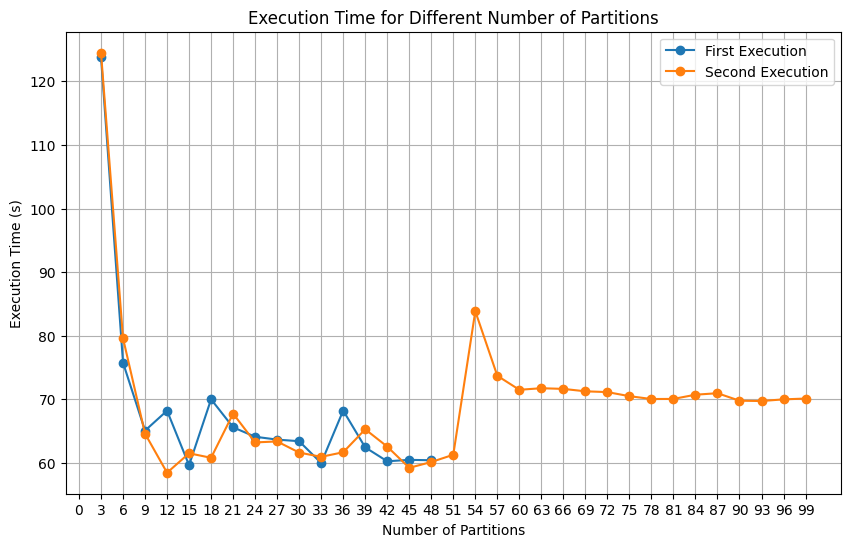

In [38]:
# df.sort_values(by='Execution Time (s)', ascending=True)
xticks = np.arange(0, 100, 3)
# Plot 2 separate line for each df
# plot 2 separate lines for df1 and df2
plt.figure(figsize=(10, 6))
plt.plot(df1['Number of Partitions'], df1['Execution Time (s)'], marker='o', label='First Execution')
plt.plot(df2['Number of Partitions'], df2['Execution Time (s)'], marker='o', label='Second Execution')
plt.title('Execution Time for Different Number of Partitions')
plt.xlabel('Number of Partitions')
plt.ylabel('Execution Time (s)')
plt.grid(True)
plt.xticks(xticks)
plt.legend()
plt.show()

#### Try the same config with another dataset

In [41]:
df_another_dataset = pd.read_csv(r'F:\FPT\DE_assignments\080824\SparkScripts\input\results\execution_statistics_dataset2.csv')
df_another_dataset


,Execution Time (s),Number of Workers,Number of Executors,Number of Partitions,Executor Cores,Executor Memory
0,127.234312,3,9,3,2,2g
1,78.695704,3,9,6,2,2g
2,63.592893,3,9,9,2,2g
3,57.731859,3,9,12,2,2g
4,63.329533,3,9,15,2,2g
5,57.959632,3,9,18,2,2g
6,68.334632,3,9,21,2,2g
7,128.875929,3,9,3,2,2g
8,79.680280,3,9,6,2,2g
9,66.508615,3,9,9,2,2g


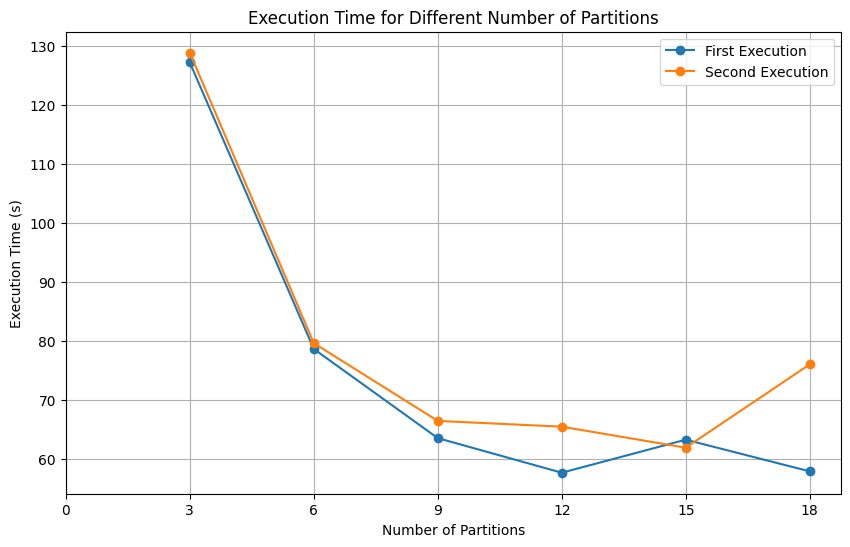

In [42]:
# split into 2 dataframes
# df1 is from row 0 to 6
df3 = df_another_dataset.iloc[0:6, :]
# df2 is from row 7 to 13
df4 = df_another_dataset.iloc[7:13, :]
xticks = np.arange(0, 21, 3)
# plot 2 separate lines for df1 and df2
plt.figure(figsize=(10, 6))
plt.plot(df3['Number of Partitions'], df3['Execution Time (s)'], marker='o', label='First Execution')
plt.plot(df4['Number of Partitions'], df4['Execution Time (s)'], marker='o', label='Second Execution')
plt.title('Execution Time for Different Number of Partitions')
plt.xlabel('Number of Partitions')
plt.ylabel('Execution Time (s)')
plt.grid(True)
plt.xticks(xticks)
plt.legend()
plt.show()


In [43]:
# # plot 2 separate lines for df1 and df2
# # set x_ticks is multiple of 3
# x_ticks = np.arange(0, 52, 3)
# plt.figure(figsize=(15, 10))

# plt.plot(df1['Number of Partitions'], df1['Execution Time (s)'], marker='v', label='Dataset 1 - First Execution')
# plt.plot(df2['Number of Partitions'], df2['Execution Time (s)'], marker='v', label='Dataset 1 - Second Execution')

# plt.plot(df3['Number of Partitions'], df3['Execution Time (s)'], marker='o', label='Dataset 2 - First Execution')
# plt.plot(df4['Number of Partitions'], df4['Execution Time (s)'], marker='o', label='Dataset 2 - Second Execution')
# plt.title('Execution Time for Different Number of Partitions')
# plt.xlabel('Number of Partitions')
# plt.ylabel('Execution Time (s)')
# plt.grid(True)
# plt.xticks(x_ticks)

# plt.legend()
# plt.show()